In [30]:
#Packages
import pandas as pd #Pour explorer les données
import numpy as np #Pour l'algèbre linéaire
import matplotlib.pyplot as plt #ce package sert à visualiser les données
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact,widgets
import folium 

In [7]:
#Collecte de données
confirme_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deces_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
retabli_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
etat_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [8]:
print(confirme_df.shape)
print(deces_df.shape)
print(retabli_df.shape)
print(etat_df.shape)

(274, 439)
(274, 439)
(259, 439)
(192, 14)


In [11]:
etat_df.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-04-01 11:25:22,33.93911,67.709953,56454.0,2484.0,51788.0,2182.0,145.020308,NaN,NaN,4.400043,4,AFG
1,Albania,2021-04-01 11:25:22,41.15330,20.168300,125157.0,2235.0,91271.0,31651.0,4349.051359,NaN,NaN,1.785757,8,ALB
2,Algeria,2021-04-01 11:25:22,28.03390,1.659600,117192.0,3093.0,81538.0,32561.0,267.250200,NaN,NaN,2.639259,12,DZA
3,Andorra,2021-04-01 11:25:22,42.50630,1.521800,12010.0,115.0,11365.0,530.0,15543.907332,NaN,NaN,0.957535,20,AND
4,Angola,2021-04-01 11:25:22,-11.20270,17.873900,22311.0,537.0,20493.0,1281.0,67.884191,NaN,NaN,2.406884,24,AGO
5,Antigua and Barbuda,2021-04-01 11:25:22,17.06080,-61.796400,1136.0,28.0,820.0,288.0,1160.035945,NaN,NaN,2.464789,28,ATG
6,Argentina,2021-04-01 11:25:22,-38.41610,-63.616700,2348821.0,55858.0,2102616.0,190347.0,5196.992188,NaN,NaN,2.378129,32,ARG
7,Armenia,2021-04-01 11:25:22,40.06910,45.038200,193736.0,3533.0,173681.0,16522.0,6537.991937,NaN,NaN,1.823616,51,ARM
8,Australia,2021-04-01 11:25:22,-25.00000,133.000000,29323.0,909.0,23012.0,5402.0,115.174177,NaN,NaN,3.099956,36,AUS
9,Austria,2021-04-01 11:25:22,47.51620,14.550100,549592.0,9368.0,503729.0,36495.0,6102.238408,NaN,NaN,1.704537,40,AUT


In [13]:
etat_df[etat_df['Country_Region']=='China']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
36,China,2021-04-01 11:25:22,30.5928,114.3055,101745.0,4841.0,96549.0,355.0,7.243306,NaN,NaN,4.757973,156,CHN


In [14]:
etat_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [17]:
#Afficher les statistiques au niveau du monde
global_data=etat_df.copy().drop(['Country_Region','Last_Update', 'Lat', 'Long_', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],axis=1)
global_synthese=pd.DataFrame(global_data.sum()).transpose()
global_synthese

,Confirmed,Deaths,Recovered
0,129015662.0,2818170.0,73195043.0


In [21]:
#Visualiser les payes les plus touchés
fig=go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r='background-color:red'
  y='background-color:yellow'
  g='background-color:green'
  df1=pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,4]=y
  df1.iloc[:,5]=r
  df1.iloc[:,6]=g

  return df1

def show_cases(n):
  n=int(n)
  return etat_df.sort_values('Confirmed',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases,n='10')

ipywLayout=widgets.Layout(border='solid 2px green')
ipywLayout.display ='none'
widgets.VBox([fig],layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [23]:
etat_class_df=etat_df.sort_values('Confirmed',ascending=False)
etat_class_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [24]:
px.bar(
    etat_class_df.head(10),
    x='Country_Region',
    y='Confirmed',
  title='Les pays les plus impactés par COVID-19 (cas confirmé)',
  color_discrete_sequence=['yellow'],
  height=500,
  width=800
)

In [25]:
px.bar(
    etat_class_df.head(10),
    x='Country_Region',
    y='Deaths',
  title='Les pays les plus impactés par COVID-19 (Decès)',
  color_discrete_sequence=['red'],
  height=500,
  width=800
)

In [27]:
px.bar(
    etat_class_df.head(10),
    x='Country_Region',
    y='Recovered',
  title='Les pays les plus impactés par COVID-19 (Recovred)',
  color_discrete_sequence=['Green'],
  height=500,
  width=800
)

In [34]:
#Visualiser les données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12, min_zoom=2)
for i in range(0,len(confirme_df)):
  folium.Circle(
      location=[confirme_df.iloc[i]['Lat'],confirme_df.iloc[i]['Long']],
      fill=True,
      radius=(int((np.log(confirme_df.iloc[i,-1]+1,00001)))+0.2)*50000,
      color='red',
      fill_color='indigo',
      

  ).add_to(m)
m

SyntaxError: ignored

In [35]:


confirme_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/22/21', '3/23/21', '3/24/21', '3/25/21', '3/26/21', '3/27/21',
       '3/28/21', '3/29/21', '3/30/21', '3/31/21'],
      dtype='object', length=439)

In [40]:
#Visualiser la situation au Maroc
conf_mar=confirme_df[confirme_df['Country/Region']=='Morocco']
dec_mar=deces_df[deces_df['Country/Region']=='Morocco']
retab_mar=retabli_df[retabli_df['Country/Region']=='Morocco']



In [54]:
confi_mar=confirme_df[confirme_df['Country/Region']=='Morocco']
dec_mar=deces_df[deces_df['Country/Region']=='Morocco']
retab_mar=retabli_df[retabli_df['Country/Region']=='Morocco']

In [56]:
confi_mar.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/22/21', '3/23/21', '3/24/21', '3/25/21', '3/26/21', '3/27/21',
       '3/28/21', '3/29/21', '3/30/21', '3/31/21'],
      dtype='object', length=439)

In [ ]:
#Préparation des données (MAROC)
confi_mar=confi_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
dec_mar=dec_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
retab_mar=retab_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

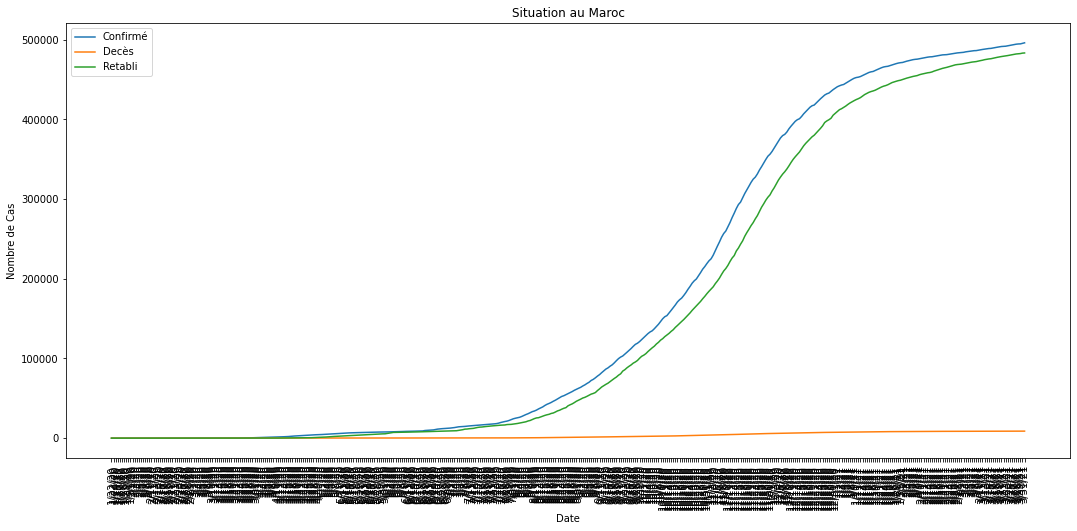

In [68]:
#Dessin de la courbe
fig,ax=plt.subplots(figsize=(18,8))
ax.plot(confi_mar.index,confi_mar.values,label='Confirmé')
ax.plot(dec_mar.index,dec_mar.values,label='Decès')
ax.plot(retab_mar.index,retab_mar.values,label='Retabli')

plt.xticks(rotation='vertical')
ax.set(xlabel='Date',ylabel='Nombre de Cas',title='Situation au Maroc')
plt.legend()